# <font color=Magenta>RECON</font>N<font color=#990000>ECT</font> project - ae<font color=Magenta>R</font>osol n<font color=Magenta>E</font>w parti<font color=Magenta>C</font>le f<font color=Magenta>O</font>rmatio<font color=Magenta>N</font> aNd s<font color=#990000>E</font>a i<font color=#990000>C</font>e mel<font color=#990000>T</font>

*Report for the course “eScience Tools in Climate Science: Linking Observations with Modelling”*

**Student:** *Kei Tsuruhara, Stockholm University [kei2.8848@gmail.com]*

**Date:** *18.11.2022*

**Assistant:** *Dominic Heslin-Rees [Dominic.Heslin-Rees@aces.su.se] (Group 3)*

## Abstract



## Table of Contents
1. [Introduction](#intro)
1. [Methods](#methods)
    1. [Packages](#packages)
    1. [Datasets](#dataset)
    1. [Analysis methods](#methodology)
1. [Results](#results)
1. [Discussion](#discussion)
1. [Conclusion](#conclusion)
1. [Outlook](#outlook)
1. [References](#references)
1. [Supplement](#suppl)

## 1. Introduction <a name="intro"></a>

- Sea ice decline \
Recent observations (e.g., England et al., 2021) have shown stronger warming in the Arctic than the global average, which is called Arctic amplification. The amplified warming is causing rapid sea ice decline in the Arctic. This rapid trend is thought to affect aerosol particles in the Arctic In XXX's study, for example, a striking correlation (r = −0.75) between monthly sea ice extent and nucleation events was shown. Other studies suggested that an increase in biological activity during summer, when temperature increases and sea ice decreases, leads to higher production and emissions of dimethylsulphide (DMS) from the sea surface. As a result, it is assumed that in the Arctic, more frequent new particle formation (NPF) events occur due to sea ice decline. However, the changing climate in the Arctic might also affect other things such as XXX. Thus, the correlation between sea ice decline and frequency of NPF events might not be causation. It is essential to evaluate if declining sea ice is actually contributing to elevated NPF events in the Arctic, and if other factors also play a role. 
- Paper shows NPF is increasing 2000-2010 (due to sea ice decline?) \
In this study, we investigated how much NPF frequency is affected by biological activity in neighbouring marine areas, and if the regions unaffected by sea ice decline have an effect on NPF events. We use satellite data and in-situ data at Zeppelin station.
#### Our group's research questions:
1. *Do we see an increase in biological activity and NPF events in observations and models?* 
1. *How is NPF frequency affected by increased biological activity in neighbouring marine areas?*
1. *What is the effect of regions unaffected by sea ice decline on NPF?* 

## 2. Methods <a name="methods"></a>

### 2.A. Packages <a name="packages"></a>


In [2]:
# import s3fs
import xarray as xr
# import urllib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# import cartopy as cy
# from matplotlib.colors import LogNorm
# import matplotlib.path as mpath
import numpy as np
# import cartopy.mpl.ticker as cticker
# import matplotlib.ticker as ticker
# import pandas as pd
# from scipy.stats import linregress
# import datetime as dt
import warnings
from shapely.errors import ShapelyDeprecationWarning
# import scipy
# from shapely.errors import ShapelyDeprecationWarning
# from matplotlib.ticker import MaxNLocator
import kei_functions as func

In [3]:
# import gcsfs
# import requests
# import intake

In [4]:
%load_ext autoreload
%autoreload 2

### 2.B. Datasets <a name="datasets"></a>

We used satellite sea ice and chlorophyll data in the period 2000-2017. Also, in order to analyze the relationship with NPF events, we focused on summer months (May, June, and July), when the first peak was detected in the chlorophyll concentration.

#### Satellite sea ice concentration (OSI-SAF)

In [5]:
ice_ds_2017 = xr.open_dataset(f'data/sea_ice_conc/ice_conc_2017.nc')

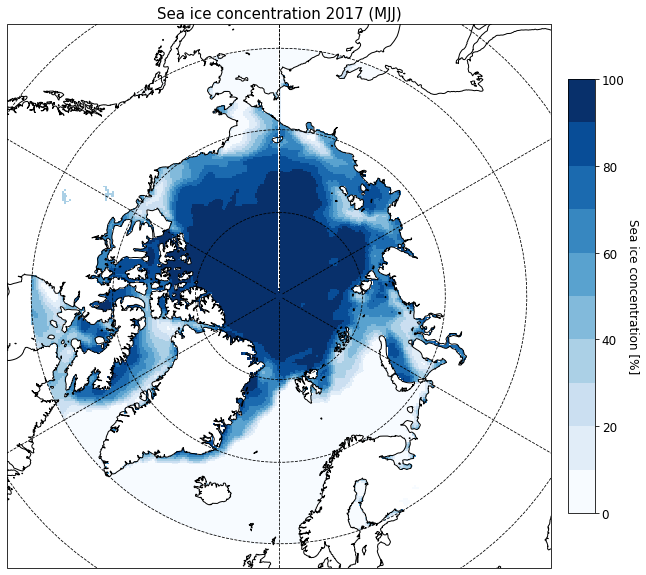

In [6]:
# Average sea ice concentration in summer 2017 (MJJ)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    func.ice_one_year(months=[5,6,7], year=2017, title='Sea ice concentration 2017 (MJJ)', figname='ice_2017_mjj')

#### Satellite chlorophyll concentration (OBS-ESACCI-OC)

In [7]:
# Get URL and open a dataset
with open("URLs.txt", "r") as f:
    lines = [line.rstrip('\n') for line in f]
urls = [x for x in lines if 'OBS-ESACCI-OC' in x]
xr_chloro = func.get_xr_from_url(urls[0],None)

In [8]:
xr_chloro_assigned_coords = xr_chloro.assign_coords(lon=(((xr_chloro.lon + 180) % 360) - 180)).sortby('lon')

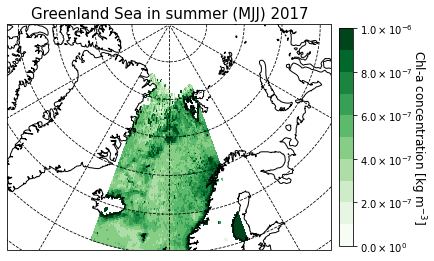

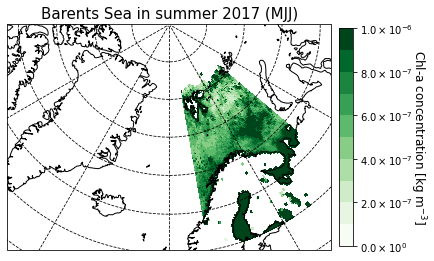

In [9]:
# Greenland Sea summer 2017
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.chl_one_year(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, title='Greenland Sea in summer (MJJ) 2017', months=[5,6,7], year=2017, figname='greenland_2017.png')

# Barents Sea summer 2017 
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.chl_one_year(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, title='Barents Sea in summer 2017 (MJJ)', months=[5,6,7], year=2017, figname='barents_2017.png')


#### UK-ESM
#### Lovisa's ?

### 2.C. Analysis methods <a name="methodology"></a>

- Trend analysis \
To see the decreasing trend of sea ice and increasing trend of chlorophyll concentrations, I plotted the trend from 2000 to 2017 in the Arctic. Our group analyzed observational data from Zeppelin station (see 2.B.), so I focused on neiboring marine areas: Greenland Sea and Barents Sea. To see the sea ice trend, the slopes of sea ice and chlorophyll concentrations were calculated using a method of robust linear regression, and were plotted on maps. Then, using the results of values of slopes, I plotted and compared the regression lines between the areas where change in sea ice concentration is below -1 % in the study period and where it's above -1 %. 
    - plots
    - affected by sea ice loss vs unaffected by sea ice -> area A, area B
    - 
- Observation vs model \

## 3. Results <a name="results"></a>

### 3.A. Sea ice trend

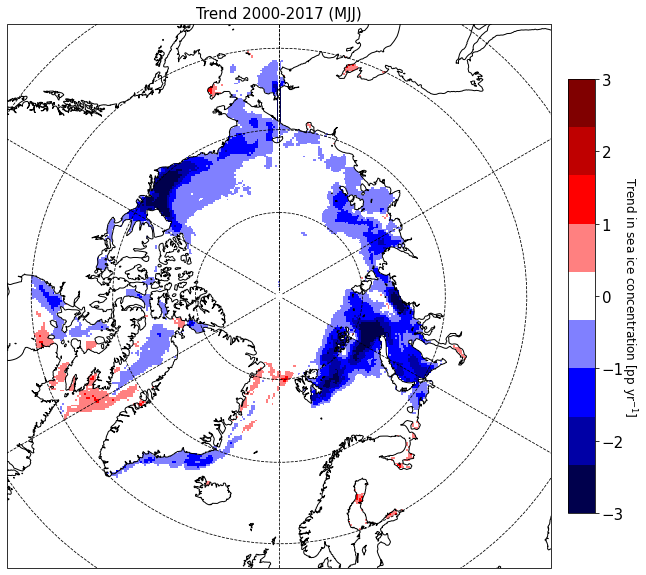

In [10]:
# Summer 2000-2017
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    func.ice_trend(months=[5,6,7], years=[2000,2017], title='Trend 2000-2017 (MJJ)', figname='ice_2000_2017_mjj')

### 3.B. Chlorophyll concentration

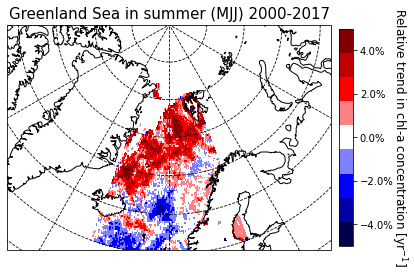

In [11]:
# Greenland Sea summer relative trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.relative_trend(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, title='Greenland Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='relative_greenland_2000_2017.png')

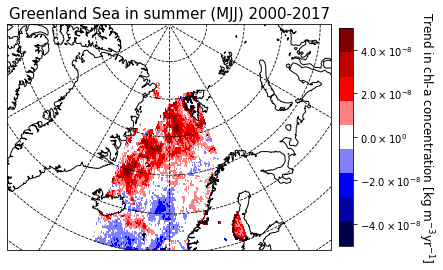

In [13]:
# Greenland Sea summer absolute trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, title='Greenland Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='absolute_greenland_2000_2017.png')

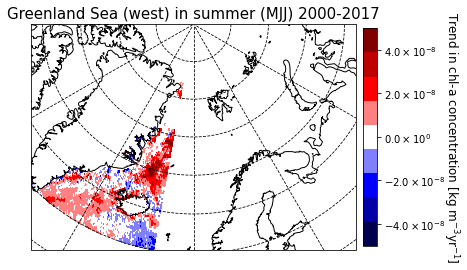

In [14]:
# Greenland Sea (west) summer absolute trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=-50, lon_max=-10, lat_min=60, lat_max=90, title='Greenland Sea (west) in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='absolute_greenland_2000_2017.png')

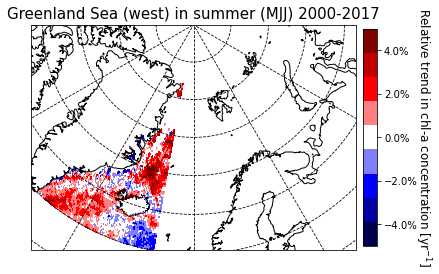

In [12]:
# Greenland Sea (west) summer relative trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.relative_trend(xr_chloro_assigned_coords, lon_min=-50, lon_max=-10, lat_min=60, lat_max=90, title='Greenland Sea (west) in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='relative_greenland_2000_2017.png')

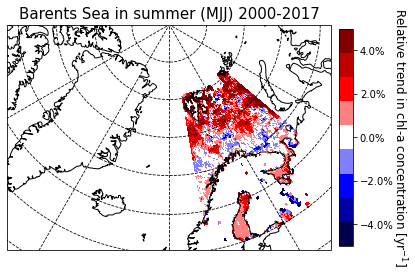

In [16]:
# Barents Sea summer relative trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.relative_trend(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, title='Barents Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='relative_barents_2000_2017.png')

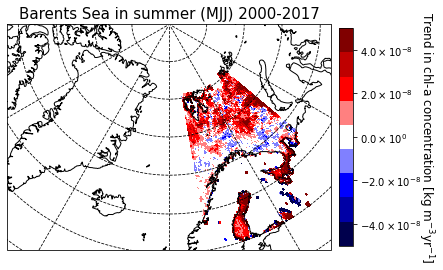

In [15]:
# Barents Sea summer absolute trend
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    func.absolute_trend(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, title='Barents Sea in summer (MJJ) 2000-2017', years=[2000,2017], months=[5,6,7], figname='absolute_barents_2000_2017.png')

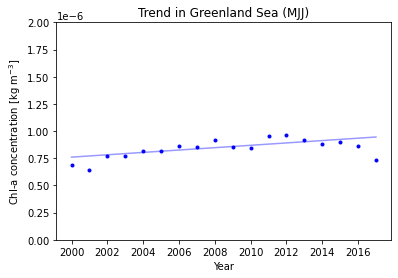

In [14]:
# Greenland Sea summer time series 2000-2017
func.plot_chl_time_series(xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], ylim=[0, 2*10**(-6)], title='Trend in Greenland Sea (MJJ)')

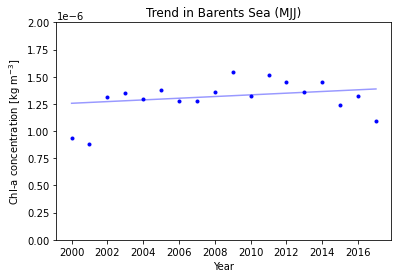

In [15]:
# Barents Sea summer time series 2000-2017
func.plot_chl_time_series(xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], ylim=[0, 2*10**(-6)], title='Trend in Barents Sea (MJJ)')

### 3.C. Comparison between area A and area B

In [19]:
# Get the sea ice trend in 432*432 grid cells
slope_2d = func.ice_slope_2d_432(months=[5,6,7], years=[2000,2017])

In [20]:
# Get lat and lon of each grid cell of area A and area B separetely
decline_coords = func.get_coords_from_trend(slope_2d, -1)

In [21]:
# Create a df list for the chlorophyll trend in area A and area B in Barents Sea
df_list_barents = func.xr_to_trend_df(xr_chl=xr_chloro_assigned_coords, lon_min=10, lon_max=50, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], decline_coords=decline_coords)

In [26]:
# Create a df list for the chlorophyll trend in area A and area B in Greenland Sea
df_list_greenland = func.xr_to_trend_df(xr_chl=xr_chloro_assigned_coords, lon_min=-20, lon_max=20, lat_min=60, lat_max=90, months=[5,6,7], years=[2000,2017], decline_coords=decline_coords)

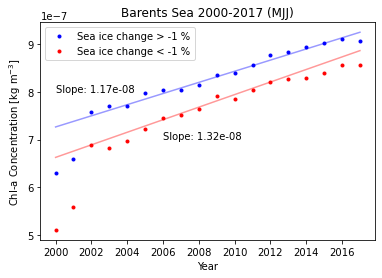

In [24]:
# Trend in chlorophyll concentration in Barents Sea
func.df_to_plot(df_above=df_list_barents[1], df_below=df_list_barents[0], confidence=0.95, title='Barents Sea 2000-2017 (MJJ)', label_below='Sea ice change < -1 %', label_above='Sea ice change > -1 %')

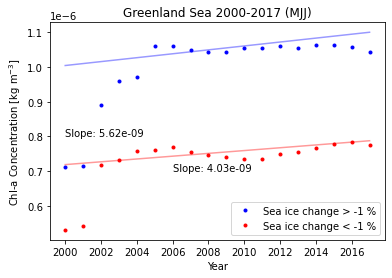

In [25]:
# # Trend in chlorophyll concentration in Greenland Sea
func.df_to_plot(df_above=df_list_greenland[1], df_below=df_list_greenland[0], confidence=0.95, title='Greenland Sea 2000-2017 (MJJ)', label_below='Sea ice change < -1 %', label_above='Sea ice change > -1 %')

## 4. Discussion <a name="discussion"></a>

- 

## 5. Conclusion <a name="conclusion"></a>

## 6. Outlook <a name="outlook"></a>

## 7. References <a name="references"></a>